<a href="https://colab.research.google.com/github/kennyxue/machine_learning_application/blob/master/tripCS_201905.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
%cd /content/gdrive/My Drive/31-AYM/AYM07/out/

/content/gdrive/My Drive/31-AYM/AYM07/out


In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors
import scipy.stats as stats
import math
from sklearn.metrics import pairwise_distances
import glob
import warnings
warnings.filterwarnings("ignore")
from scipy.misc import imread

In [0]:
import plotly
#import plotly_express as px
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode, plot
import plotly.figure_factory as ff

In [0]:
plt.rcParams['figure.dpi'] = 100
mpl.rcParams['font.sans-serif']=[u'SimHei']
mpl.rcParams['axes.unicode_minus']=False
font = { 'size' : 16}
mpl.rc('font', **font)
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 16
TITLE_SIZE = 20

mpl.rc('font', size=SMALL_SIZE)          # controls default text sizes
mpl.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
mpl.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
mpl.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
mpl.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
mpl.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
mpl.rc('figure', titlesize=TITLE_SIZE)  # fontsize of the figure title

In [0]:
def read_file(file_name,sheet_name,header_row=0):
    df_file = pd.ExcelFile(file_name)
    df_orig = pd.read_excel(df_file,sheet_name,header=header_row)
    df_orig=df_orig.drop_duplicates()
    return df_orig

In [0]:
def drop_odd_rows(dataframe):
    df = dataframe
    i_drop=[]
    for i in range(1,df.shape[0]-1):
        if df["GID"].iloc[i] == df["GID"].iloc[i+1] and df["FD_DEPARTURE_TIME"].iloc[i] == df["FD_DEPARTURE_TIME"].iloc[i+1] \
        and df["FD_ARRIVAL_TIME"].iloc[i] == df["FD_ARRIVAL_TIME"].iloc[i+1]:
            i_drop.append(i)
    df = df.drop(df.index[i_drop])
    df = df.reset_index(drop=True)
    return df

In [36]:
df_orig = read_file(file_name="TC_List0516.xlsx",sheet_name="data_orig",header_row=0)
df_orig.head(1)

,DOC_SUBJECT,FD_NUMBER,NAME,GID,HRIS_CC_NAME,FD_DEPARTURE_TIME,FD_ARRIVAL_TIME
0,常熟工厂出差,CCSQ-201807313255,张志会Zhang Zhihui,azha1603,机械部件上海工程中心传动机构组,2018-08-01,2018-08-01


In [37]:
df_orig=drop_odd_rows(dataframe=df_orig)
df_orig.head(1)

,DOC_SUBJECT,FD_NUMBER,NAME,GID,HRIS_CC_NAME,FD_DEPARTURE_TIME,FD_ARRIVAL_TIME
0,常熟工厂出差,CCSQ-201807313255,张志会Zhang Zhihui,azha1603,机械部件上海工程中心传动机构组,2018-08-01,2018-08-01


In [38]:
df_name = read_file(file_name="TC_List0516.xlsx",sheet_name="name_info",header_row=0)
df_name.tail(1)

,工号,GID,Remark,position
164,10032919,asun1124,有限元分析工程师,0


In [0]:
df = pd.merge(df_orig,df_name,on="GID")

In [40]:
df["FD_DEPARTURE_TIME"] = pd.to_datetime(df["FD_DEPARTURE_TIME"],dayfirst=True, format='%Y-%m-%d')
df["FD_ARRIVAL_TIME"] = pd.to_datetime(df["FD_ARRIVAL_TIME"],dayfirst=True, format='%Y-%m-%d')
df.head(1)

,DOC_SUBJECT,FD_NUMBER,NAME,GID,HRIS_CC_NAME,FD_DEPARTURE_TIME,FD_ARRIVAL_TIME,工号,Remark,position
0,长城PHA样件制造常熟工厂现场支持,CCSQ-201706220043,蔡智欣Cai Zhixin,acai42,机械部件上海样件车间,2017-06-24,2017-06-25,10015793,质量工程师,0


In [0]:
date_s = "FD_DEPARTURE_TIME"
date_e = "FD_ARRIVAL_TIME"
df["year"]=df[date_s].dt.year
df["week_of_year"]=df[date_s].dt.weekofyear
df["day_of_year_start"]=df[date_s].dt.dayofyear
df["month_start"]=df[date_s].dt.month
df["week_day_array_start"] = df[date_s].dt.dayofweek
df["day_of_year_end"]=df[date_e].dt.dayofyear
df["month_end"]=df[date_e].dt.month
df["week_day_array_end"] = df[date_e].dt.dayofweek
df['trip_day'] = df["day_of_year_end"]-df["day_of_year_start"]+1
df["trip_times"] = np.where(df["trip_day"]>=1, 1, 0)
df['hotel_required_night'] = df["day_of_year_end"]-df["day_of_year_start"]
df["is_work_day_start"] = np.where(df["week_day_array_start"]<=4, 1, 0)
df["is_work_day_end"] = np.where(df["week_day_array_end"]<=4, 1, 0)
df["is_manager_expert"] = np.where(df["position"]>=2, 1, 0)

In [42]:
df.head(1)

,DOC_SUBJECT,FD_NUMBER,NAME,GID,HRIS_CC_NAME,FD_DEPARTURE_TIME,FD_ARRIVAL_TIME,工号,Remark,position,...,week_day_array_start,day_of_year_end,month_end,week_day_array_end,trip_day,trip_times,hotel_required_night,is_work_day_start,is_work_day_end,is_manager_expert
0,长城PHA样件制造常熟工厂现场支持,CCSQ-201706220043,蔡智欣Cai Zhixin,acai42,机械部件上海样件车间,2017-06-24,2017-06-25,10015793,质量工程师,0,...,5,176,6,6,2,1,1,0,0,0


In [43]:
df.columns

Index(['DOC_SUBJECT', 'FD_NUMBER', 'NAME', 'GID', 'HRIS_CC_NAME',
       'FD_DEPARTURE_TIME', 'FD_ARRIVAL_TIME', '工号', 'Remark', 'position',
       'year', 'week_of_year', 'day_of_year_start', 'month_start',
       'week_day_array_start', 'day_of_year_end', 'month_end',
       'week_day_array_end', 'trip_day', 'trip_times', 'hotel_required_night',
       'is_work_day_start', 'is_work_day_end', 'is_manager_expert'],
      dtype='object')

In [0]:
summary_list = ['position', 'year','month_start', 'trip_day', 'trip_times','hotel_required_night','is_work_day_start']
group_list = ['position', 'year','month_start','is_work_day_start']

In [0]:
df_manager = df[df["is_manager_expert"]==1]
df_employee = df[df["is_manager_expert"]==0]

In [0]:
df_employee_sum = df_employee[summary_list].groupby(group_list,as_index=False).sum()
df_manager_sum = df_manager[summary_list].groupby(group_list,as_index=False).sum()

In [0]:
with pd.ExcelWriter('output0506.xlsx') as writer:  # doctest: +SKIP
    df.to_excel(writer, sheet_name='df')
    df_manager.to_excel(writer, sheet_name='df_manager')
    df_employee.to_excel(writer, sheet_name='df_employee')
    df_manager_sum.to_excel(writer, sheet_name='df_manager_sum')
    df_employee_sum.to_excel(writer, sheet_name='df_employee_sum')

In [18]:
df_employee_sum.head()

,position,year,month_start,is_work_day_start,trip_day,trip_times,hotel_required_night
0,0,2017,2,1,1,1,0
1,0,2017,4,0,1,1,0
2,0,2017,5,1,19,7,12
3,0,2017,6,0,3,2,1
4,0,2017,6,1,62,19,43


In [20]:
!pip install calmap

In [0]:
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import pandas as pd
import calmap

all_days = pd.date_range('1/1/2017', periods=900, freq='D')
days = all_days #np.random.choice(all_days, 500)
events = pd.Series(np.zeros(len(days)), index=days)

In [0]:
for i in range(df_employee.shape[0]):
    day_s = df_employee["day_of_year_start"].iloc[i]
    day_e = df_employee["day_of_year_end"].iloc[i]
    departure =  df_employee["FD_DEPARTURE_TIME"].iloc[i] #.strftime('%Y-%m-%d')
    arrival =  df_employee["FD_ARRIVAL_TIME"].iloc[i] #.strftime('%Y-%m-%d')
    if day_s == day_e:
        events.loc[departure] = events.loc[departure]+1
    else:
        for j in range(day_e-day_s):
            trip_day = departure+ pd.offsets.Day(j)
            events.loc[trip_day] = events.loc[trip_day]+1

In [23]:
events_trip = events[events>0]
events_trip.describe()

count    384.000000
mean       1.916667
std        1.148655
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
dtype: float64

In [0]:
% matplotlib inline
import seaborn as sns; sns.set()

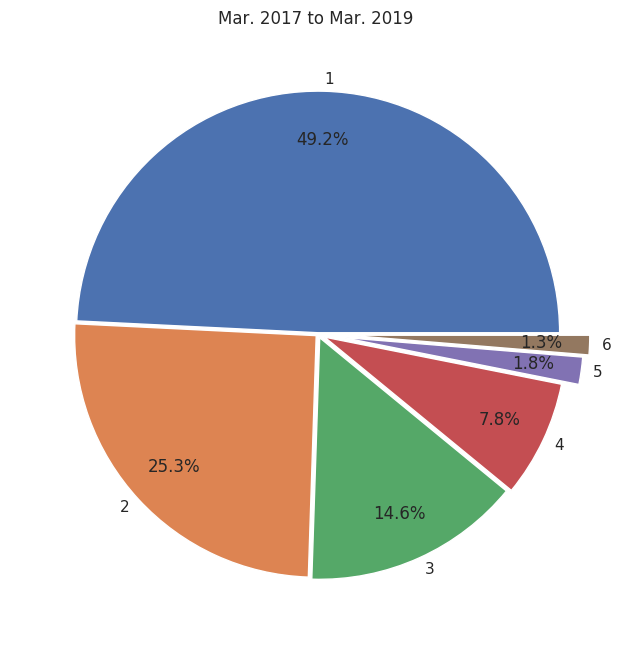

In [29]:
df_events = pd.DataFrame({'numbers':events_trip.value_counts().index, 'counts':events_trip.value_counts().values})
df_events=df_events.sort_values(by='numbers',ascending=True)
df_events.numbers = df_events.numbers.astype(int)
fig, ax = plt.subplots(figsize=(8,8),dpi=100)
x_explode=1/(df_events.counts+3)
ax.pie(df_events.counts, labels=df_events.numbers, explode=x_explode, autopct='%1.1f%%',pctdistance=0.8, labeldistance=1.05,)
plt.title('Mar. 2017 to Mar. 2019 ')
plt.show()

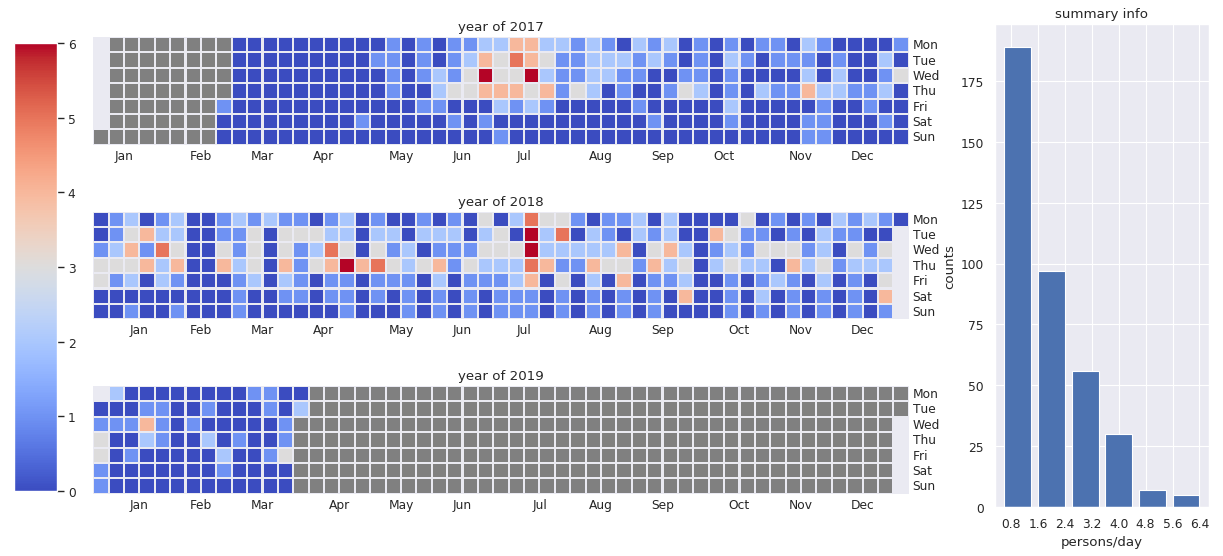

In [32]:
fig = plt.figure(figsize=(18,8),dpi=80)
grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.3)
ax1 = plt.subplot(grid[0, :3])
ax2 = plt.subplot(grid[1, :3])
ax3 = plt.subplot(grid[2, :3])
ax4 = plt.subplot(grid[:, 3]);

ax1.set(title="year of 2017")
ax2.set(title="year of 2018")
ax3.set(title="year of 2019")
ax4.set(title="summary info",xlabel="persons/day",ylabel="counts")
cax1 = calmap.yearplot(events_trip, year=2017,fillcolor='grey',cmap='coolwarm',ax=ax1,)
cax2 = calmap.yearplot(events_trip, year=2018,fillcolor='grey',cmap='coolwarm',ax=ax2)
cax3 = calmap.yearplot(events_trip, year=2019,fillcolor='grey',cmap='coolwarm',ax=ax3)
ax4.bar(df_events.numbers,df_events.counts)
ax4.xaxis.set_major_locator(plt.MaxNLocator(8))
cbaxes = fig.add_axes([0.07, 0.15, 0.03, 0.7]) 
fig.colorbar(cax3.get_children()[1], cax=cbaxes, orientation='vertical')
plt.show()

In [33]:
nights = pd.Series(np.zeros(len(days)), index=days)
for i in range(df_employee.shape[0]):
    day_s = df_employee["day_of_year_start"].iloc[i]
    day_e = df_employee["day_of_year_end"].iloc[i]
    departure =  df_employee["FD_DEPARTURE_TIME"].iloc[i] #.strftime('%Y-%m-%d')
    arrival =  df_employee["FD_ARRIVAL_TIME"].iloc[i] #.strftime('%Y-%m-%d')
    if day_s != day_e:
        for j in range(day_e-day_s-1):
            trip_day = departure+ pd.offsets.Day(j)
            nights.loc[trip_day] = nights.loc[trip_day]+1
nights_trip = nights[nights>0]
nights_trip.describe()

count    215.000000
mean       1.269767
std        0.597321
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
dtype: float64

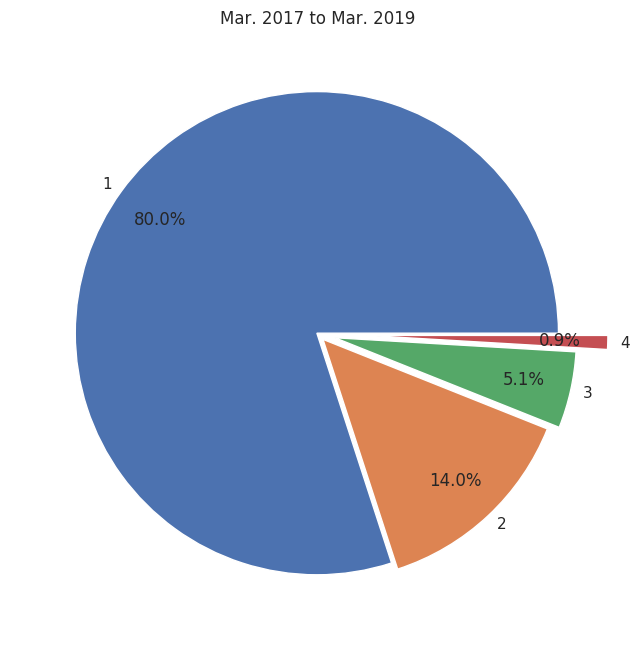

In [34]:
df_nights = pd.DataFrame({'numbers':nights_trip.value_counts().index, 'counts':nights_trip.value_counts().values})
df_nights=df_nights.sort_values(by='numbers',ascending=True)
df_nights.numbers = df_nights.numbers.astype(int)
fig, ax = plt.subplots(figsize=(8,8),dpi=100)
x_explode=1/(df_nights.counts+3)
ax.pie(df_nights.counts, labels=df_nights.numbers, explode=x_explode, autopct='%1.1f%%',pctdistance=0.8, labeldistance=1.05,)
plt.title('Mar. 2017 to Mar. 2019')
plt.show()

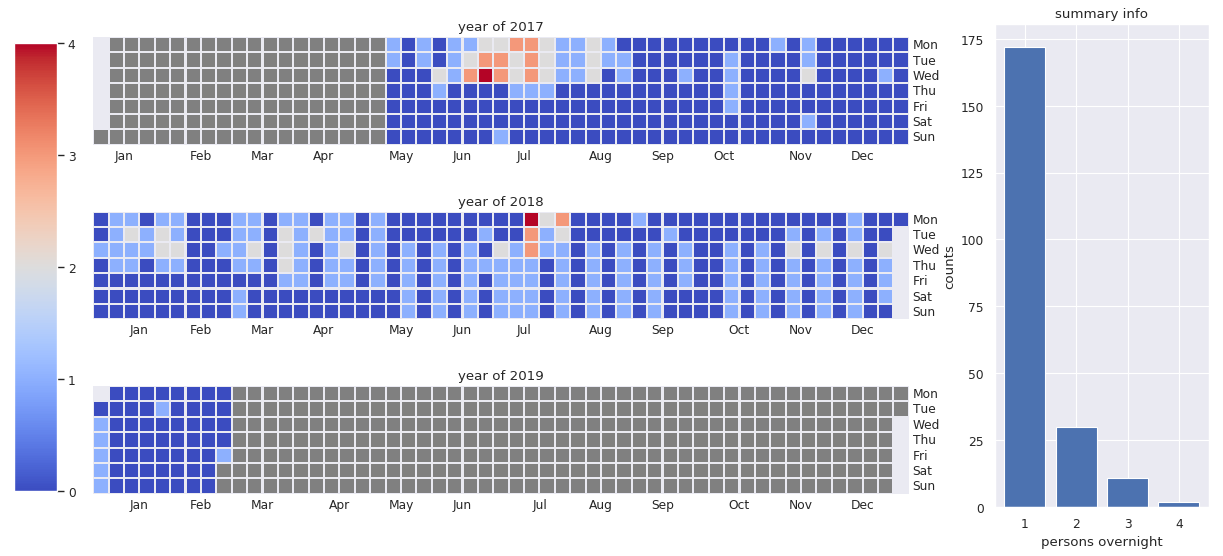

In [35]:
fig = plt.figure(figsize=(18,8),dpi=80)
grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.3)
ax1 = plt.subplot(grid[0, :3])
ax2 = plt.subplot(grid[1, :3])
ax3 = plt.subplot(grid[2, :3])
ax4 = plt.subplot(grid[:, 3]);

ax1.set(title="year of 2017")
ax2.set(title="year of 2018")
ax3.set(title="year of 2019")
ax4.set(title="summary info",xlabel="persons overnight",ylabel="counts")
cax1 = calmap.yearplot(nights_trip, year=2017,fillcolor='grey',cmap='coolwarm',ax=ax1,)
cax2 = calmap.yearplot(nights_trip, year=2018,fillcolor='grey',cmap='coolwarm',ax=ax2)
cax3 = calmap.yearplot(nights_trip, year=2019,fillcolor='grey',cmap='coolwarm',ax=ax3)
ax4.bar(df_nights.numbers,df_nights.counts)
#ax4.xaxis.set_major_locator(plt.MaxNLocator(8))
cbaxes = fig.add_axes([0.07, 0.15, 0.03, 0.7]) 
fig.colorbar(cax3.get_children()[1], cax=cbaxes, orientation='vertical',ticks=range(5))
plt.show()